# 5.2.3 Anaysis Kickoff

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


# Inspect the City Data DataFrame

In [5]:
# Get count of columns/rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# check for Nulls - Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# check data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# check how many data points there are for each type of city - returns an array. 
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points (entries) for 'Urban' cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data points (entries) for 'Suburban' cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
# Get the number of data points (entries) for 'Rural' cities.
sum(city_data_df["type"]=="Rural")

18

# Inspect Ride Data Dataframe

In [12]:
# Get count of columns/rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# check data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# MERGE to two data sets into one 
## new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
## where how is the constraint (join).


# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# 5.3.1 Create dataframes for each type of city
### Plot the following for a bubble chart:

- The average fare for each type of city on the y-axis (5.3.3)
- The total number of rides for each type of city on the x-axis (5.3.2)
- To correlate size to the number of drivers for each city, get the avg driver_count for each city. (5.3.4)
- Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city

### Create the Urban city DataFrame.

In [15]:

## name the df (variable) = use the merged dataset to filter on urban.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Create the Suburban and Rural city DataFrames.

In [16]:

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [17]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


# 5.3.2 Number of riders for each city type (using Pandas)

### Get the number of rides for urban cities.

In [18]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

### Create the suburban and rural ride count.

In [19]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [20]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

# 5.3.3 Get the average Fare for each city type

In [21]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [23]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

# 5.3.4 get the avg no. of drivers for each city type

In [24]:
# new variable (name) = [use the city_type df].groupby (city) to get the .avg() of the [driver count]
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [25]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [26]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

# 5.3.5 Create the bubble chart 
aka scatter plot with extra formatting

### Build the scatter plots for urban cities.

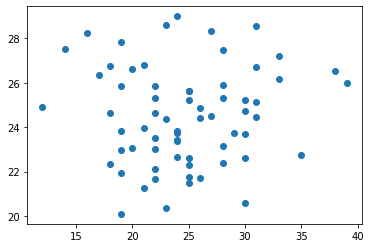

In [27]:
plt.scatter(urban_ride_count, urban_avg_fare)

#### customzie the plot for urban cities - add size.

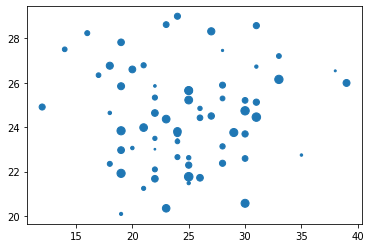

In [28]:

plt.scatter(urban_ride_count
            , urban_avg_fare
            , s=urban_driver_count) # set the size to driver count, making the marker size dynamic

#### add on to customizations by adding labels, change color, make the markers bigger.


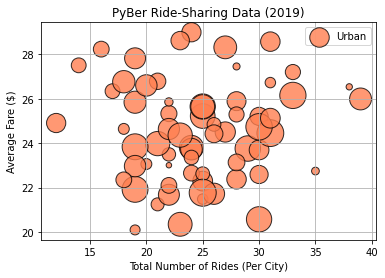

In [29]:
plt.scatter(urban_ride_count                     # x axix
            , urban_avg_fare                     # y axix
            , s=10*urban_driver_count            # increas the size
            , c="coral"                          # set color
            , edgecolor="black", linewidths=1    # set edgecolor and linewidth
            , alpha=0.8                          # set transparency
            , label="Urban")                     # label for legend
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()

### Build the scatter plots for suburban cities.

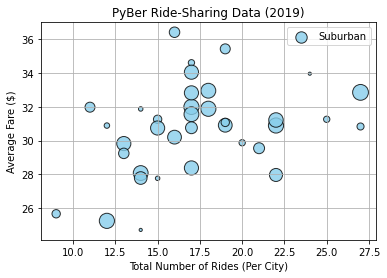

In [30]:
plt.scatter(suburban_ride_count
            , suburban_avg_fare
            , s=10*suburban_driver_count
            , c="skyblue"
            , edgecolor="black"
            , linewidths=1
            , alpha=0.8
            , label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

### Build the scatter plots for rural cities.

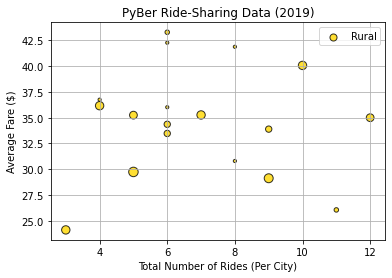

In [31]:
plt.scatter(rural_ride_count
            , rural_avg_fare
            , s=10*rural_driver_count
            , c="gold"
            , edgecolor="black"
            , linewidths=1
            , alpha=0.8
            , label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

# 5.3.6  Create a bubble chart for all cities
show one bubble chart that that has all the city types

### to combime multiple charts into one, add them all in the same cell


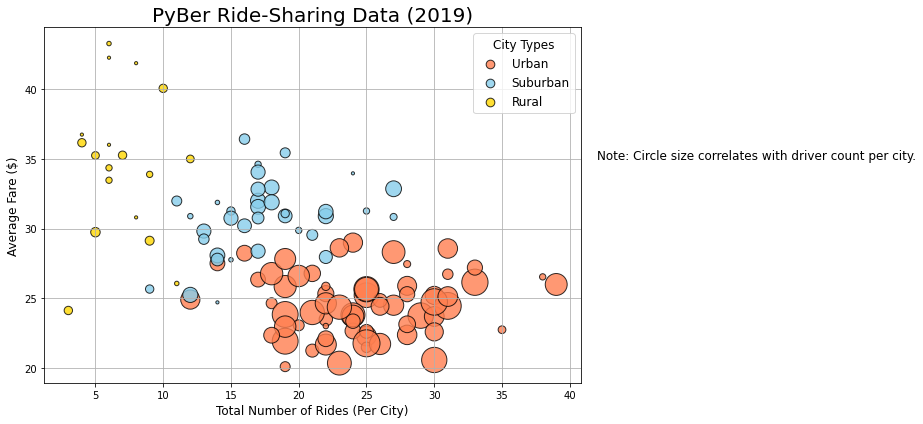

In [32]:
# add the scatter charts for each type of city.
 
## plotting all the data on one chart, formats the x-axis automatically - no need to chane the x-limit.
plt.figure(figsize=(13,6))
plt.scatter(urban_ride_count
            , urban_avg_fare
            , s=10*urban_driver_count
            , c="coral"
            , edgecolor="black"
            , linewidths=1
            , alpha=0.8
            , label="Urban")

plt.scatter(suburban_ride_count
            , suburban_avg_fare
            , s=10*suburban_driver_count
            , c="skyblue"
            , edgecolor="black"
            , linewidths=1
            , alpha=0.8
            , label="Suburban")

plt.scatter(rural_ride_count
            , rural_avg_fare
            , s=10*rural_driver_count
            , c="gold"
            , edgecolor="black"
            , linewidths=1
            , alpha=0.8
            , label="Rural")

# Incorporate the other graph properties

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)     # how to get a bigger title
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
# plt.legend()  # default legend included city size

# Create a legend - set scale markers to the same size
lgnd = plt.legend(fontsize="12"          # set font size
                  , mode="Expanded"      # horzontal expand
                  , scatterpoints=1      # no. of points
                  , loc="best"           # legend position
                  , title="City Types")  # legend title
lgnd.legendHandles[0]._sizes = [75]      # marker sizes for each group
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)        # set font size of legend

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.tight_layout()

# Save the figure.
plt.savefig("resources/Fig1.jpg")

# Show the plot (order is important - must be after save fig)
plt.show()


# 5.4.1 Summary Statistics for No. of Rides by City Type
AKA. more than one way to get the stats

measure of central tendency - date tends to be toward the middle of the dataset 
- mean, median, mode.

## using Panda .describe() function

In [33]:
# Get summary statistics on df
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


## SKILL DRILL compare the outputs of all three DataFrames.

In [34]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [35]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [36]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [37]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [38]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

##  Using Panda mean(), median(), mode() Methods
get the mean without the complete summary

In [39]:
# Calculate the MEAN(AVG) of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [40]:
# Calculate the MEDIAN of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [41]:
# Calculate the MODE of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

## Using NumPy mean(), median(), mode() functions
## SciPy mode() function

In [42]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [43]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

 
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

# returns: ModeResult(mode=array([22], dtype=int64), count=array([7])).
# three parts: (the mode, datatype, count (number of time it appeard in the dataset))

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


### Calculate the measures of central tendency for the ride count for the RURAL cities.

In [44]:

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

 
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


### Calculate the measures of central tendency for the ride count for the SUBURBAN cities.

In [45]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")

 
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


# 5.4.2 Summary Stats for the Fare by City type

### create a series (list of all the fares 

In [46]:
# Get the fares for the URBAN cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

### calcuate the central tendancies (mean median, mode) for URBAN cities

In [47]:
# Calculate the measures of central tendency for the average fare for the URBAN cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [48]:
# Get the fares for the SUBURBAN cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [49]:
# Calculate the measures of central tendency for the average fare for the SUBURBAN cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [50]:
# Get the fares for the RURAL cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [51]:
# Calculate the measures of central tendency for the average fare for the URBAN cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


# 5.4.3 Summary Stats for the No. Drivers by City type

In [52]:
# Get the driver count data from the URBAN cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [53]:
# Calculate the measures of central tendency for the average fare for the URBAN cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean no. of drivers for urban cities  is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median no. drivers for urban cities is {median_urban_drivers:.0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode no. drivers for urban cities is {mode_urban_drivers}.")

The mean no. of drivers for urban cities  is 37.
The median no. drivers for urban cities is 37.
The mode no. drivers for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [54]:
# Get the driver count data from the SUBURBAN cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [55]:
# Calculate the measures of central tendency for the average fare for the SUBURBAN cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean no. of drivers for suburban cities is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median no. drivers for suburban cities is {median_suburban_drivers:.0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode no. drivers for suburban cities is {mode_suburban_drivers}.")

The mean no. of drivers for suburban cities is 14.
The median no. drivers for suburban cities is 16.
The mode no. drivers for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [56]:
# Get the driver count data from the RURAL cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [57]:
# Calculate the measures of central tendency for the average fare for the URBAN cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean no. of drivers for rural cities is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median no.drivers for rural cities is {median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode no. drivers for rural cities  is {mode_rural_drivers}.")

The mean no. of drivers for rural cities is 4.
The median no.drivers for rural cities is 4.
The mode no. drivers for rural cities  is ModeResult(mode=array([1], dtype=int64), count=array([32])).


# 5.4.4 Create Box-and-Whisker Plots (graphs)
(a good way to show how a lot of information is distributed, especially outliers)

### Create a box-and-whisker plot for the URBAN cities ride count.

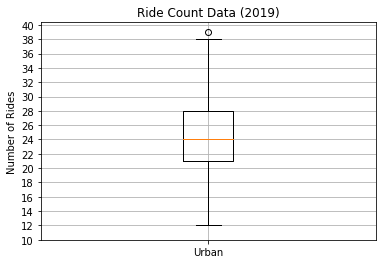

In [58]:
x_labels = ["Urban"]               # create axis labels with a list (of one item)
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)  # labels 

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))     # set the tick range with increments
ax.grid()
plt.show()

### Create a box-and-whisker plot for the SUBURBAN cities ride count.

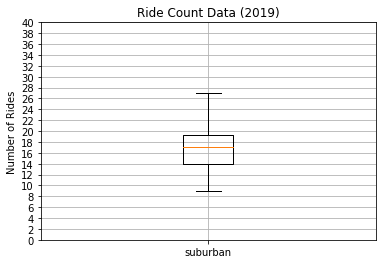

In [59]:
x_labels = ["suburban"]               # create axis labels with a list (of one item)
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)  # labels 

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 41, step=2.0))     # set the tick range with increments
ax.grid()
plt.show()

### Create a box-and-whisker plot for the RURAL cities ride count.

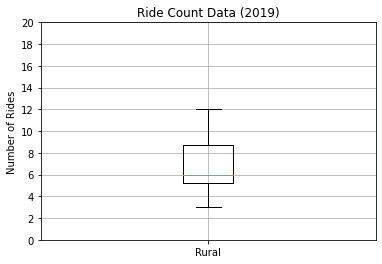

In [60]:
x_labels = ["Rural"]               # create axis labels with a list (of one item)
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)  # labels 

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 21, step=2.0))     # set the tick range with increments
ax.grid()
plt.show()

###  Add all RIDE COUNT box-and-whisker plots to the same graph.

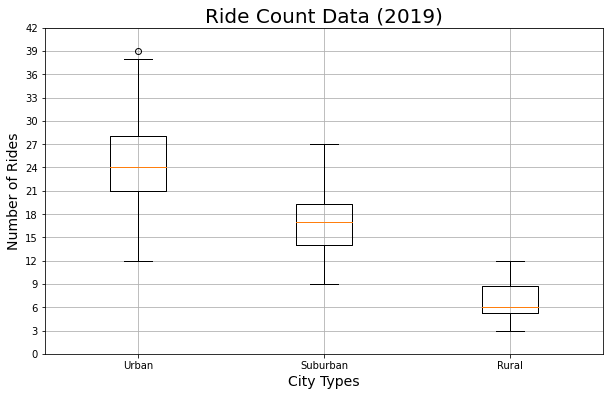

In [61]:
x_labels = ["Urban", "Suburban","Rural"]       # create axis labels with a list (3 itemsb)
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))        # increase the size of the chart
ax.set_title('Ride Count Data (2019)',fontsize=20)                     # change the font size
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))     # set the tick range with increments
ax.grid()

# Save the figure.
plt.savefig("resources/Fig2.png")
plt.show()

### One of our tasks was to find out if there were any outliers. FIND the highest rider count.

In [62]:
# Find the highest rider count based on the outlier data previously calculated.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


## Box-and-Whisker Plots for Ride Fare Data

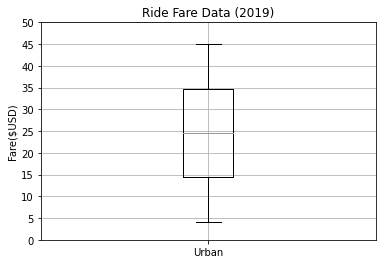

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [63]:
# Create a box-and-whisker plot for the URBAN fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()                #include the number displayed in the graph!

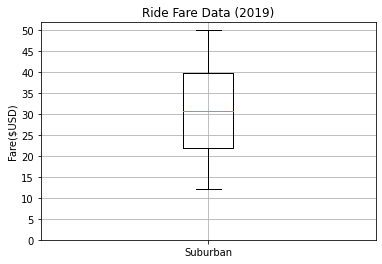

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [64]:
# Create a box-and-whisker plot for the SUBURBAN fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()                #include the number displayed in the graph!

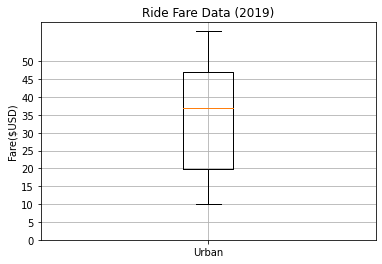

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [65]:
# Create a box-and-whisker plot for the RURAL fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()                #include the number displayed in the graph!

### Add all RIDE FARE box-and-whisker plots to the same graph.

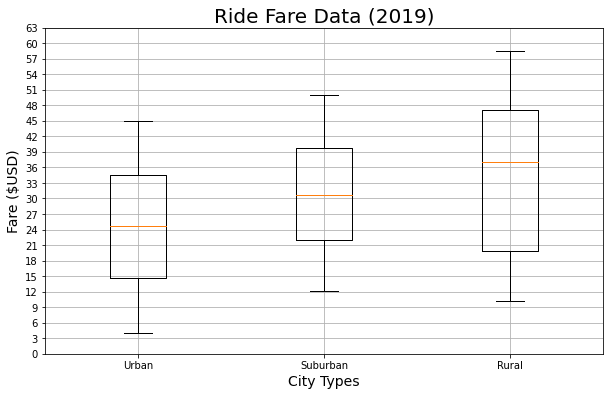

In [66]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]       # create axis labels with a list (3 itemsb)
fare_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))        # increase the size of the chart
ax.set_title('Ride Fare Data (2019)',fontsize=20)                     # change the font size
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 64, step=3.0))     # set the tick range with increments
ax.grid()

# Save the figure.
plt.savefig("resources/Fig3.png")
plt.show()

## Box-and-Whisker Plots for Driver Count Data

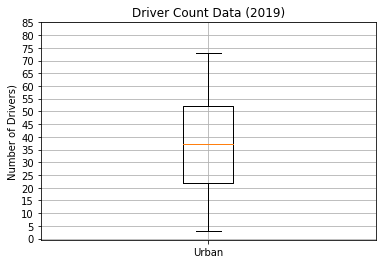

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [67]:
# Create the box-and-whisker plot for the URBAN driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

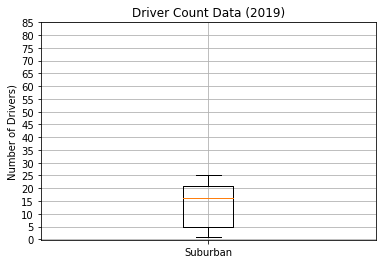

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [68]:
# Create the box-and-whisker plot for the SUBURBAN driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

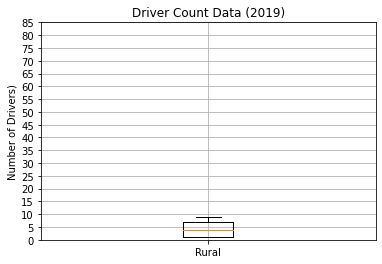

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [69]:
# Create the box-and-whisker plot for the RURAL driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

### Add all DRIVER COUNT box-and-whisker plots to the same graph.

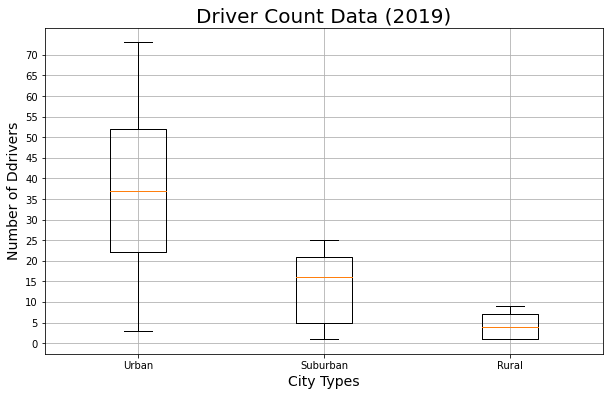

In [70]:
x_labels = ["Urban", "Suburban","Rural"]       # create axis labels with a list (3 itemsb)
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))        # increase the size of the chart
ax.set_title('Driver Count Data (2019)',fontsize=20)                     # change the font size
ax.set_ylabel('Number of Ddrivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 75, step=5.0))     # set the tick range with increments
ax.grid()

# Save the figure.
plt.savefig("resources/Fig4.png")
plt.show()

# 5.5 Percentage of Total Fares by City Type
## 5.5.1 Percentage of Fares for Each City
To create this pie chart, we will need to do the following:
- Get the total fares for each city type.
- Get the total for all the fares for all the city types.
- Calculate the percentage of the total fares for each city type.

In [71]:
# Get the sum of the fares for each city type. - create a data series with one of the col in df
## 1- grooup by the type 2 - use .sum method on the fair column
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [72]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [73]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [75]:
# ALTERNATE METHOD - one line of code 
## Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

## 5.5.2 Percentage of Fares by City Type
create a pie chart by using MATLAB

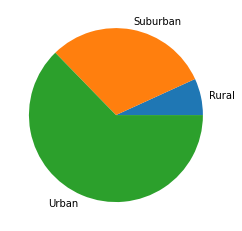

In [76]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

### add the extras - title, labels, colors etc.

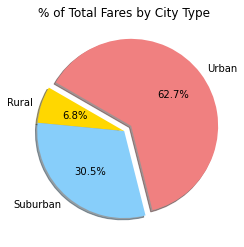

In [77]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

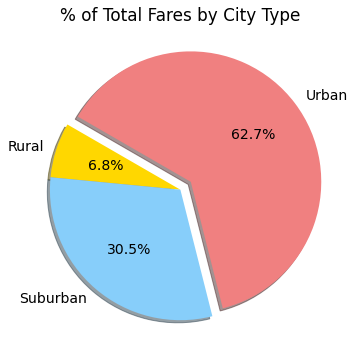

In [80]:
# Import mpl to change the plot configurations using rcParams.
## RCPARAMS  - accesses the [run and configure] settings for the Matplotlib parameters.
import matplotlib as mpl

# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14                    # mpl allows you to change the title font size 

# Save Figure
plt.savefig("resources/Fig5.png")

# Show Figure
plt.show()

# 5.6 Percentage of Total Rides by City Type
## 5.6.1 Calculate Ride Percentage
To create this pie chart, we need to do the following:
- Get the total number of rides for each city type.
- Get the total rides for all the city types.
- Calculate the percentage of the total rides for each city type.

In [90]:
# total no. rides for each city type
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type 

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [91]:
# get the total number of rides for all cities
total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

## 5.6.2 Percentage of Rides by City Type

In [92]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * sum_rides_by_type / total_rides
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

### Build the graph: percentage of rides by city type pie chart.
(matplotlib is already active) 

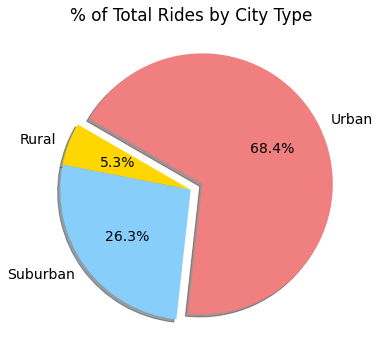

In [94]:
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("resources/Fig6.png")
# Show Figure
plt.show()

# 5.7 Percentage of Total Drivers by City Type
## 5.7.1 calcuate driver percentages
To create this pie chart, we need to do the following:
- Get the total number of drivers for each city type.
- Get the total drivers for all the city types.
- Calculate the percentage of the total drivers for each city type.

In [96]:
# total no. drivers for each city type
sum_drivers_by_type = pyber_data_df.groupby(["type"]).count()["driver_count"]
sum_drivers_by_type 

type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

In [97]:
# get the total number of drivers for all cities
total_drivers = pyber_data_df["driver_count"].count()
total_drivers

2375

In [99]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

## 5.7.2 Percentage of Drivers for Each City Type

### Build the Chart: percentage of rides by city type pie chart.

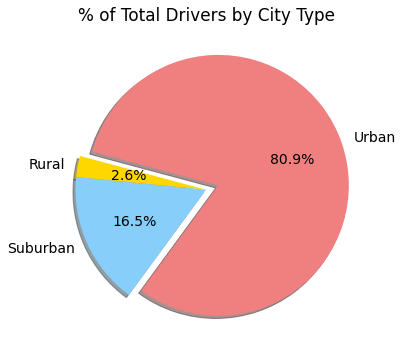

In [101]:
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("resources/Fig7.png")
# Show Figure
plt.show()